In [40]:
import datetime

import matplotlib as mp
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt


sns.set()
sns.set_style('whitegrid')
sns.set_style('ticks')

# data

In [125]:
# https://sjpermits.org/permits/general/reportdata.asp
# Column key: https://sjpermits.org/permits/ftproot/SanJose/permitdataMonths/PD_00_Layout.txt

# The Permit Data File is a listing of all permits issued within a
# certain date range.

# Permit Data File in text - This is a text file which can be saved 
# in Notepad or in EXCEL.  One suggestion is to save this file in a 
# folder in your hard drive and rename it with extension .XLS, so 
# you could open it in EXCEL. You can then select and copy/paste 
# any or all of the fields onto a new EXCEL worksheet.  You can 
# sort this file by whatever field you choose. The description of
# the fields are shown below.

# Permit Data File in EXCEL format - It contains the following 
# fields (with letters indicating the EXCEL columns):
# -A Tract
# -B APN
# -C Issue Date
# --added Final Date
# -D Lot
# -E Permit Number/ Folder Number
# -F Owner - not displayed any more
# -G Contractor
# -H Applicant
# -I Job Location / Brief Description of Job
# -J PermitApprovals
# -K SubCode
# -L SubCode Description
# -M WorkCode
# -N WorkCode Description
# -O Census Code
# -P Permit Valuation
# -Q Reroof Valuation
# -R Sq Ft
# -S Dwelling Units
# -T FolderRSN (record id)
# -U Swimming pool y/n
# -V Sewer y/n
# -W Enterprise y/n
# -X Permit Flag Building, Plumbing, Mechanical, Electrical

df = None
for year in range(2001, 2018):
    print(year)
    for ext in ['txt', 'TXT']:
        try:
            year_data = pd.read_csv('san-jose/data/PD_%s_ISSUE.%s' % (year, ext),
                                    delimiter='\t',
                                    header=0,
                                    parse_dates=[
                                        'ISSUEDATE',
                                    ],
                                    infer_datetime_format=True,
                                    error_bad_lines=False,
                                    warn_bad_lines=True)
        except:
            continue
        else:
            break
#     if isinstance(year_data.iloc[0].ISSUEDATE, str):
#         for date_format in ['%m/%d/%Y %I:%M:S %p', '%d-%b-%y']:
#             year_data['ISSUEDATE'] = pd.to_datetime(year_data['ISSUEDATE'], format=date_format, infer_datetime_format=True)
#             if not isinstance(year_data.iloc[0].ISSUEDATE, str):
#                 breakg
    print(year_data.iloc[0]['ISSUEDATE'])
    if df is None:
        df = year_data
    else:
        df = df.append(year_data)

2001
2001-01-01 00:00:00
2002
2002-01-01 00:00:00
2003
2003-01-02 00:00:00
2004
2004-01-01 14:08:37
2005
2005-01-01 00:00:00
2006
2006-01-02 00:00:00
2007
2007-01-01 00:00:00
2008


Skipping line 7675: expected 25 fields, saw 26
Skipping line 11977: expected 25 fields, saw 26



2008-01-02 00:00:00
2009


Skipping line 309: expected 25 fields, saw 27
Skipping line 567: expected 25 fields, saw 26
Skipping line 2196: expected 25 fields, saw 26



2009-01-02 00:00:00
2010
2010-01-01 00:00:00
2011
2011-01-03 00:00:00
2012
2011-01-03 00:00:00
2013
2013-01-01 00:00:00
2014
2014-01-01 00:00:00
2015


Skipping line 21672: expected 25 fields, saw 26



2015-01-01 00:00:00
2016


Skipping line 916: expected 25 fields, saw 26
Skipping line 3903: expected 25 fields, saw 26
Skipping line 10267: expected 25 fields, saw 26
Skipping line 19242: expected 25 fields, saw 26
Skipping line 19244: expected 25 fields, saw 26
Skipping line 20591: expected 25 fields, saw 26
Skipping line 20593: expected 25 fields, saw 26
Skipping line 20594: expected 25 fields, saw 26
Skipping line 20722: expected 25 fields, saw 26



2016-01-02 00:00:00
2017


Skipping line 294: expected 25 fields, saw 26



2017-01-02 00:00:00


In [126]:
data = df

In [131]:
def quarter(dt):
    if pd.isna(dt):
        return ""
    return "%s Q%s" % (dt.year, int(np.ceil((dt.month-1)/3)) + 1)


def half(dt):
    if pd.isna(dt):
        return ""
    return "%s H%s" % (dt.year, int(np.ceil((dt.month-1)/6)) + 1)


def monthyear(dt):
    if pd.isna(dt):
        return ""
    return "%s %s" % (dt.year, dt.strftime("%b"))

data['_year'] = data['ISSUEDATE'].apply(lambda dt: str(dt.year))
data['_quarter'] = data['ISSUEDATE'].apply(quarter)
data['_half'] = data['ISSUEDATE'].apply(half)
data['_month'] = data['ISSUEDATE'].apply(monthyear)

# Exploration

In [141]:
data[data.APN == '01505018']

,APN,APPLICANT,CENSUSCODE,CONTRACTOR,DWELLUNITS,ENTERPRISE,FINALDATE,FOLDERNUMBER,FOLDERRSN,ISSUEDATE,...,SUBCODE,SUBDESC,SWIMMINGPOOL,TRACT,WORKCODE,WORKDESC,_year,_quarter,_half,_month
2765,01505018,BARRON CONSTRUCTION,101,BARRON CONSTRUCTION,1.0,N,6/4/2008,2006-008612-000-00-RS,1224884,2007-03-05,...,4030,Single Family,N,NaN,140,New Construction,2007,2007 Q1,2007 H1,2007 Mar
2850,01505018,BARRON CONSTRUCTION,NaN,BARRON CONSTRUCTION,0.0,N,NaN,2007-007233-000-00-RS,1260160,2007-03-07,...,4030,Single Family,N,9199,310,Sub-Trades Only,2007,2007 Q1,2007 H1,2007 Mar
125,01505018,KAWADRI MAZEN M TRUSTEE & ET AL,101,NONE,1.0,N,9/12/2008,2007-021439-000-00-RS,1274443,2008-01-04,...,4030,Single Family,N,NaN,140,New Construction,2008,2008 Q1,2008 H1,2008 Jan
3363,01505018,GURVINDER SINGH,101,NONE,1.0,N,NaN,2007-035223-000-00-RS,1288496,2008-03-26,...,4030,Single Family,N,NaN,140,New Construction,2008,2008 Q1,2008 H1,2008 Mar


In [146]:
def first_filings(data, min_year=0, max_year=0, id_field='APN', datefield='ISSUEDATE', unitfield='DWELLUNITS'):
    min_year = min_year or data[datefield].min().year
    max_year = max_year or data[datefield].max().year + 1
    # first_seen is a hack to solve this issue:
    # multiple permit numbers are given to the same project on a given blocklot,
    # so there is a lot of duplication. first_seen is a heuristic that is basically:
    # "if a permit was filed to develop a parcel after 1995, we should consider that
    # one long-running project"
    #
    # This is needed so that we don't count a permit that, eg, was submitted in 2005
    # and re-submitted in 2008 as separate projects.
    #
    # It also ignore permits that don't have any proposed units, as those can be
    # considered preliminary permits
    first_seen = data[(data[datefield] > datetime.datetime(2001,1,1)) &
                      (data[unitfield] > 0)].groupby([id_field]).aggregate({
        datefield: 'min'
    })

    # Build a new data frame that only consists of the very first time the project was seen
    first_filings = pd.DataFrame(columns=data.columns)
    num_filings = []
    for year in range(min_year+1, max_year):
        filed_in_year = data[
            (data[datefield] < datetime.datetime(year+1,1,1)) &
            (data[datefield] > datetime.datetime(year,1,1)) &
            (~data[id_field].isin(first_seen[first_seen[datefield] < datetime.datetime(year,1,1)].index))]
        filed_in_year = filed_in_year.drop_duplicates([id_field, 'Best Status'])
        num_filings.append(len(filed_in_year))
        first_filings = first_filings.append(filed_in_year)
    
    # Useful time periods for plotting
#     first_filings['_year'] = first_filings[datefield].apply(lambda dt: str(dt.year))
#     first_filings['_quarter'] = first_filings[datefield].apply(quarter)
#     first_filings['_half'] = first_filings[datefield].apply(half)
#     first_filings['_month'] = first_filings[datefield].apply(monthyear)
    return first_filings

In [ ]:
ff = first_filings(data)

In [140]:
data[data.DWELLUNITS > 0].groupby('APN').aggregate({'APN': 'count'})

,APN
APN,
,2
,37
00000000,2
01501003,1
01502006,1
01505007,1
01505018,3
01505018,4
01505067,1


# Analysis

In [132]:
before = data[data.ISSUEDATE < datetime.datetime(2016,7,1)]  # Before Prop C
after = data[data.ISSUEDATE >= datetime.datetime(2016,7,1)]  # After Prop C

## All projects with some market-rate units

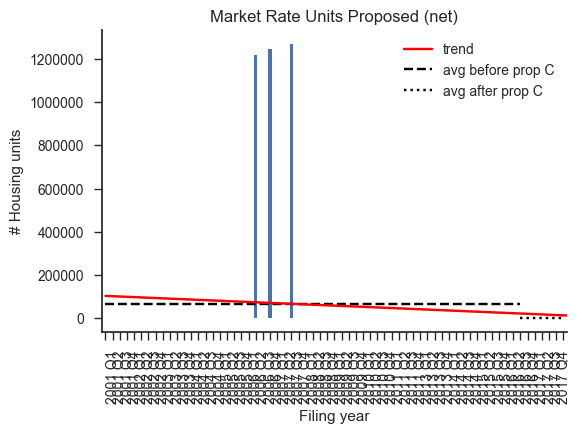

In [133]:
mrk_data = data.groupby('_quarter').aggregate({'DWELLUNITS': 'sum'})
d = mrk_data.DWELLUNITS.values.tolist()
params = np.polyfit(range(len(d)), d, 1)
poly = np.poly1d(params)

mrk_data_before = before.groupby('_quarter').aggregate({'DWELLUNITS': 'sum'})
d = mrk_data_before.DWELLUNITS.values.tolist()
offset = len(d)
avg_before = np.mean(d)

mrk_data_after = after.groupby('_quarter').aggregate({'DWELLUNITS': 'sum'})
d = mrk_data_after.DWELLUNITS.values.tolist()
avg_after = np.mean(d)

f = mp.pyplot.figure()
ax = f.gca()
p = mrk_data.plot.bar(ax=ax)
p.set_label("_nolegend_")

xp = np.linspace(0, len(mrk_data.DWELLUNITS.values), 20)
l1 = ax.plot(xp, poly(xp), label='trend', color='red')
l2 = ax.hlines(avg_before, 0, offset, label='avg before', linestyles='dashed')
l3 = ax.hlines(avg_after, offset, len(d) + offset, label='avg after', linestyles='dotted')
mp.pyplot.title("Market Rate Units Proposed (net)")
ax.set_ylabel("# Housing units")
ax.set_xlabel("Filing year")
#ax.legend()
ax.legend((l1[0], l2, l3), ('trend', 'avg before prop C', 'avg after prop C'))
sns.despine()
f.set_dpi(100)
#f.savefig("figs/market-rate-net.png", dpi=300, bbox_inches='tight')

## All Affordable units

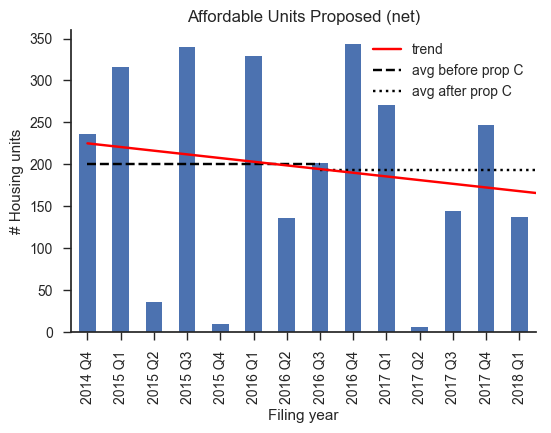

In [14]:
aff_data = prj_res.groupby('_quarter').aggregate({'PRJ_FEATURE_AFFORDABLE_NET': 'sum'})
d = aff_data.PRJ_FEATURE_AFFORDABLE_NET.values.tolist()
params = np.polyfit(range(len(d)), d, 1)
poly = np.poly1d(params)

aff_data_before = before.groupby('_quarter').aggregate({'PRJ_FEATURE_AFFORDABLE_NET': 'sum'})
d = aff_data_before.PRJ_FEATURE_AFFORDABLE_NET.values.tolist()
offset = len(d)
avg_before = np.mean(d)

aff_data_after = after.groupby('_quarter').aggregate({'PRJ_FEATURE_AFFORDABLE_NET': 'sum'})
d = aff_data_after.PRJ_FEATURE_AFFORDABLE_NET.values.tolist()
avg_after = np.mean(d)

f = mp.pyplot.figure()
ax = f.gca()
p = aff_data.plot.bar(ax=ax)
p.set_label("_nolegend_")

xp = np.linspace(0, len(aff_data.PRJ_FEATURE_AFFORDABLE_NET.values), 20)
l1 = ax.plot(xp, poly(xp), label='trend', color='red')
l2 = ax.hlines(avg_before, 0, offset, label='avg before', linestyles='dashed')
l3 = ax.hlines(avg_after, offset, len(d) + offset, label='avg after', linestyles='dotted')
mp.pyplot.title("Affordable Units Proposed (net)")
ax.set_ylabel("# Housing units")
ax.set_xlabel("Filing year")
#ax.legend()
ax.legend((l1[0], l2, l3), ('trend', 'avg before prop C', 'avg after prop C'))
sns.despine()

f.set_dpi(100)
f.savefig("figs/affordable-net.png", dpi=300, bbox_inches='tight')

## Break down by project type

The percentage of subsidized affordable units mandated by law varies according to the size of the project:

* Fewer than 10 units: 0%
* Fewer than 25 units: 12%
* 25 or more units: 20%

The old requirement was a flat 12% on projects with more than 10 units, so we can compare the classes of projects to get an estimate for the impact of Prop C.

In [20]:
def project_type(mrk_units):
    if not mrk_units:
        return "NA"
    if int(mrk_units) < 10:
        return "0"
    elif int(mrk_units) < 25:
        return "12"
    else:
        return "18-20"
    
prj_res['_project_type'] = prj_res[prj_res['PRJ_FEATURE_MARKET_RATE_NET']>0]['PRJ_FEATURE_MARKET_RATE_NET'].apply(project_type)

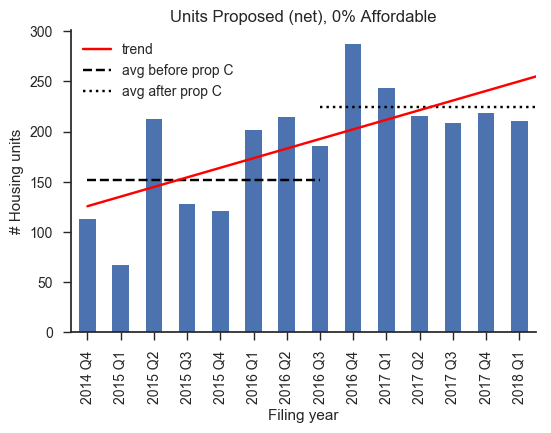

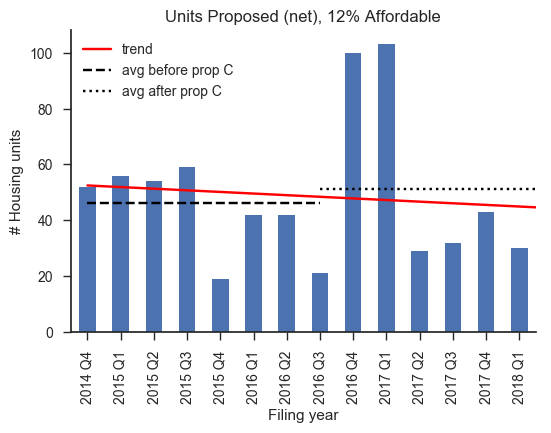

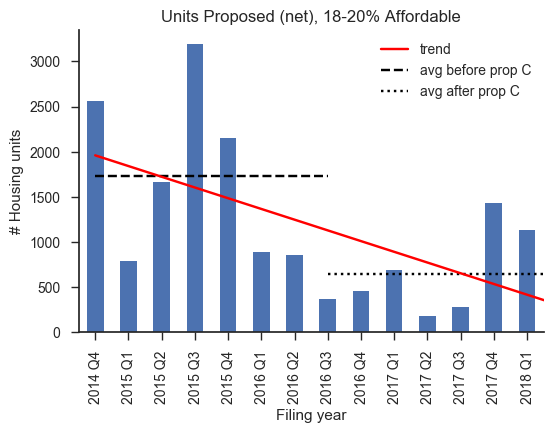

In [22]:
before = prj_res[prj_res.date_opened < datetime.datetime(2016,7,1)]  # Before Prop C
after = prj_res[prj_res.date_opened >= datetime.datetime(2016,7,1)]  # After Prop C

mrk_data = prj_res.groupby(['_quarter', '_project_type']).aggregate({'PRJ_FEATURE_MARKET_RATE_NET': 'sum'})
mrk_data_before = before.groupby(['_quarter', '_project_type']).aggregate({'PRJ_FEATURE_MARKET_RATE_NET': 'sum'})
mrk_data_after = after.groupby(['_quarter', '_project_type']).aggregate({'PRJ_FEATURE_MARKET_RATE_NET': 'sum'})

idx = pd.IndexSlice
for c, _project_type in enumerate(['0', '12', '18-20']):
    _mrk = mrk_data.loc[idx[:, _project_type], idx[:]]
    _mrk_before = mrk_data_before.loc[idx[:, _project_type], idx[:]]
    _mrk_after = mrk_data_after.loc[idx[:, _project_type], idx[:]]
    
    d = _mrk.PRJ_FEATURE_MARKET_RATE_NET.values.tolist()
    params = np.polyfit(range(len(d)), d, 1)
    poly = np.poly1d(params)

    d = _mrk_before.PRJ_FEATURE_MARKET_RATE_NET.values.tolist()
    offset = len(d)
    avg_before = np.mean(d)

    d = _mrk_after.PRJ_FEATURE_MARKET_RATE_NET.values.tolist()
    avg_after = np.mean(d)
    f = mp.pyplot.figure()
    ax = f.gca()
    #ax = axarr[c]
    p = _mrk.plot.bar(x=_mrk.index.levels[0], ax=ax)
    #p.set_label("_nolegend_")

    xp = np.linspace(0, len(_mrk.PRJ_FEATURE_MARKET_RATE_NET.values), 20)
    l1 = ax.plot(xp, poly(xp), label='trend', color='red')
    l2 = ax.hlines(avg_before, 0, offset, label='avg before', linestyles='dashed')
    l3 = ax.hlines(avg_after, offset, len(d) + offset, label='avg after', linestyles='dotted')
    ax.set_xlabel("%s%% Affordable" % _project_type)

    #ax.legend()
    mp.pyplot.title("Units Proposed (net), %s%% Affordable" % _project_type)
    ax.set_ylabel("# Housing units")
    ax.set_xlabel("Filing year")
    #ax.legend()
    ax.legend((l1[0], l2, l3), ('trend', 'avg before prop C', 'avg after prop C'))
    sns.despine()
    f.set_dpi(100)
    if c == 0:
        ax.legend((l1[0], l2, l3), ('trend', 'avg before prop C', 'avg after prop C'))
    sns.despine()
    f.set_dpi(100)
    f.savefig("figs/market-rate-net-%s-affordable.png" % _project_type, dpi=100, bbox_inches='tight')